Credits/Course URL: https://www.udemy.com/course/machinelearning/

## Hierarchical Clustering

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

#### Reading the data

In [2]:
data = pd.read_csv(r'E:\Github\Datasets\Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


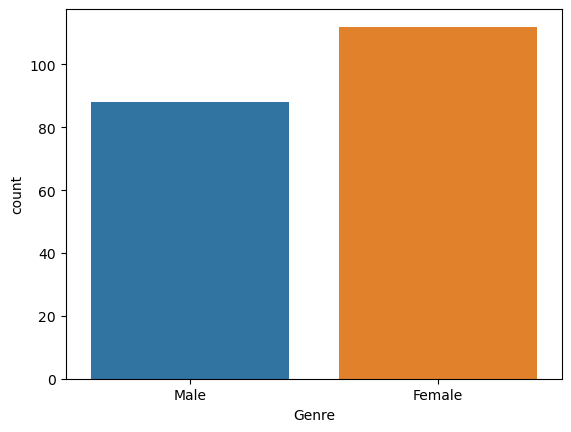

In [5]:
sns.countplot(x='Genre', data = data);

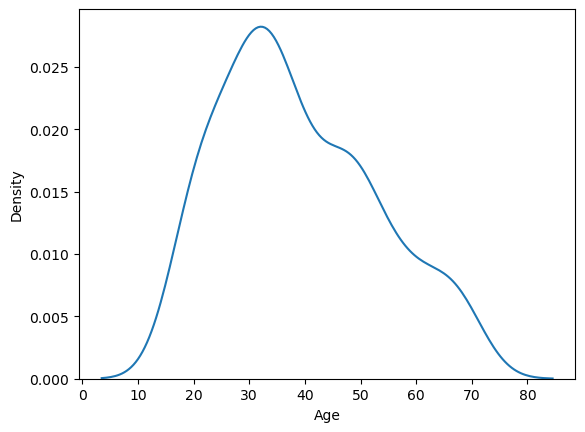

In [6]:
sns.kdeplot(x = 'Age', data = data);

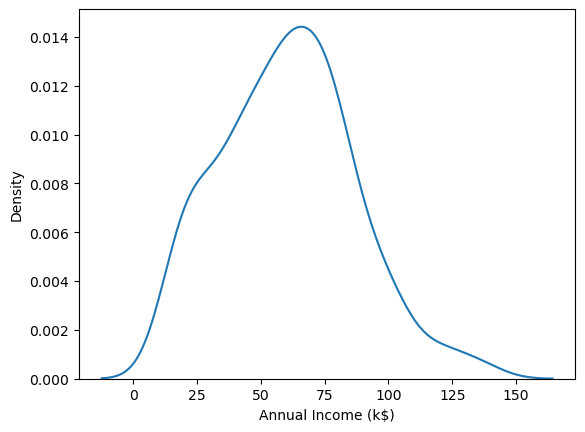

In [7]:
sns.kdeplot(x = 'Annual Income (k$)', data = data);

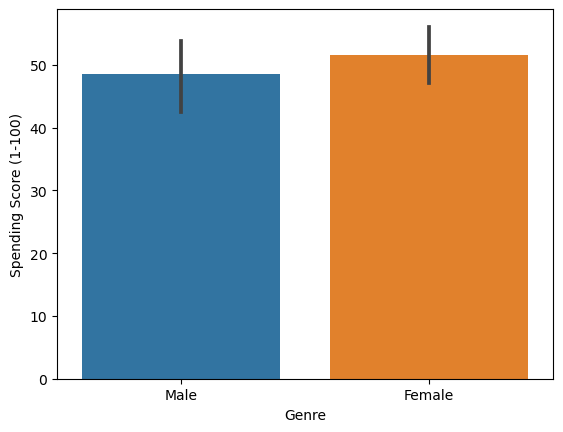

In [8]:
sns.barplot(x = 'Genre', y = 'Spending Score (1-100)', data = data);

In [9]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
data.groupby('Genre').agg(['mean', 'median'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].round(2)

Age        Annual Income (k$)        Spending Score (1-100)       
         mean median               mean median                   mean median
Genre                                                                       
Female  38.10   35.0              59.25   60.0                  51.53   50.0
Male    39.81   37.0              62.23   62.5                  48.51   50.0

In [12]:
data_processed = data.copy(deep=True)

In [13]:
data_processed.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [14]:
data_processed = data_processed.drop(['CustomerID', 'Genre', 'Age'], axis = 1)

In [15]:
data_processed.head(3)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6


In [16]:
data_processed.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [17]:
data_processed = data_processed.rename(columns={'Annual Income (k$)': 'Annual_Income', 
                                                'Spending Score (1-100)':'Spending_Score' })

In [18]:
data_processed.head(3)

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6


#### Getting relevant features of the dataset

In [19]:
X = data_processed.values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

#### Scaling the data

In [23]:
scaler = StandardScaler()

In [24]:
X = scaler.fit_transform(X)

In [25]:
X[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

#### Getting optimal number of clusters

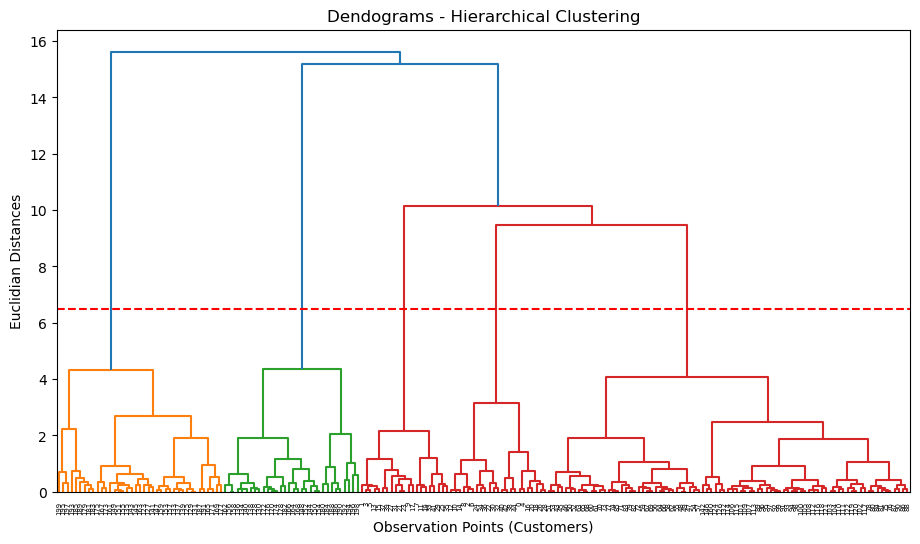

In [30]:
plt.figure(figsize=(11,6))
links = sch.linkage(X, method='ward')
dendograms = sch.dendrogram(links)
plt.axhline(y=6.5, color='r', linestyle='--')
plt.title('Dendograms - Hierarchical Clustering')
plt.xlabel('Observation Points (Customers)')
plt.ylabel('Euclidian Distances')
plt.show()

#### Training the Hierarchical Clustering model on the dataset

In [32]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hierarchical = hierarchical_clustering.fit_predict(X)

In [33]:
y_hierarchical

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [43]:
data_processed.head(3)

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6


In [44]:
data_processed['Cluster'] = y_hierarchical
data_processed.head()

,Annual_Income,Spending_Score,Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


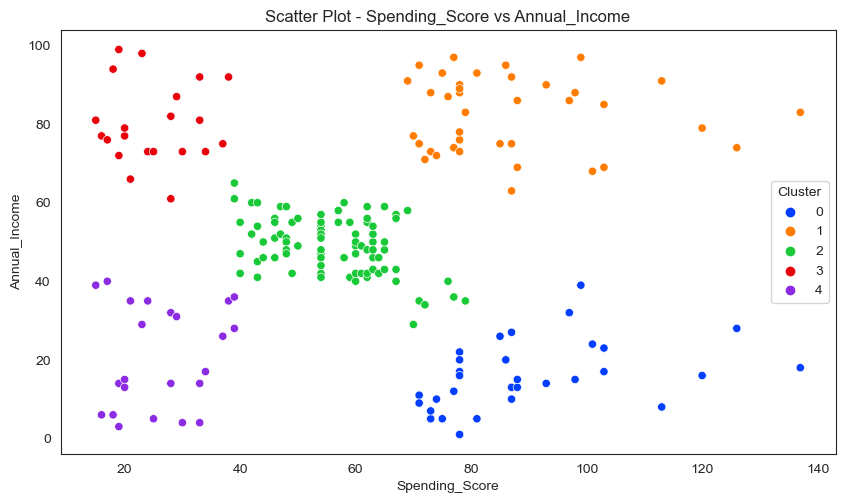

In [45]:
plt.figure(figsize=(10,5.5))
sns.set_style("white")

sns.scatterplot(x = 'Annual_Income', y = 'Spending_Score', data = data_processed, hue = 'Cluster', palette="bright")
#sns.scatterplot(x = cluster_centers[:, 0], y = cluster_centers[:,1], color = 'yellow', s = 150, label = 'Centroids')
plt.title("Scatter Plot - Spending_Score vs Annual_Income")
plt.ylabel("Annual_Income")
plt.xlabel("Spending_Score")
plt.show()